# -------------------------------- Kaggle Competition -----------------------------------

In [137]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, FunctionTransformer, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score

%matplotlib inline

In [138]:
train_csv = '../data/train.csv'
train = pd.read_csv(train_csv)

In [139]:
test_csv = '../data/test.csv'
test = pd.read_csv(test_csv)

In [140]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 3000)

In [141]:
train.shape

(2051, 81)

In [142]:
test.shape

(879, 80)

## 01_EDA_and_Cleaning.ipynb   

In [143]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [144]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### Looking for null values:

In [145]:
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [146]:
test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              821
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [147]:
# Replacing the NaN values to 0 in numeric columns and to . in string columns.
#Code taken from: https://stackoverflow.com/questions/34913590/fillna-in-multiple-columns-in-place-in-python-pandas
train = train.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))
test = test.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))

In [148]:
train.isnull().sum()# No missing values now

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

In [149]:
test.isnull().sum()# No missing values now

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

### Checking the types

In [150]:
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [151]:
test.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

 The types match across the two datasets
 No unwanted types

# 02_Preprocessing_and_Feature_Engineering.ipynb  

We will want to merge the data sets in order to work on both of them simultaneously.

### Merging

In [152]:
train_objs_num = len(train)

In [153]:
dataset = pd.concat(objs=[train, test], axis=0)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


### Preprocessing & Feature Engineering

In [154]:
### Dividing the MS Zoning between residences and non-residence
dataset['MS Zoning'].replace(['RL','RM','RH','RP'], 1, inplace=True)
dataset['MS Zoning'].replace(['FV','C','A','I', 'C (all)', 'A (agr)','I (all)'], 0, inplace=True)
dataset['MS Zoning'].value_counts()

1    2762
0     168
Name: MS Zoning, dtype: int64

In [155]:
### Assumptions: 
# -> We assume that the condition of the price of the house will be affected by the contion 
# as well as the square footage of the different areas in the house.
# Therefore: 
# (Garage Condition)
dataset['Garage Cond'].replace(['Ex'], 5, inplace=True)
dataset['Garage Cond'].replace(['Gd'], 4, inplace=True)
dataset['Garage Cond'].replace(['TA'], 3, inplace=True)
dataset['Garage Cond'].replace(['Fa'], 2, inplace=True)
dataset['Garage Cond'].replace(['Po'], 1, inplace=True)
dataset['Garage Cond'].replace(['.'], 1, inplace=True)
# (Garage Area) 
### Interaction Term:
dataset['Garage Cond * Garage Area'] = dataset['Garage Cond'] * dataset['Garage Area']

In [156]:
### Continuation: --> Not too much correlation between Bsmt cond and Bsmt qual
# ( Basement Cond)
dataset['Bsmt Cond'].replace(['Ex','Gd','TA'], 1, inplace=True)
dataset['Bsmt Cond'].replace(['Fa','Po','.'], 0, inplace=True)
# (Basement Qual)
dataset['Bsmt Qual'].replace(['Ex'], 5, inplace=True)
dataset['Bsmt Qual'].replace(['Gd'], 4, inplace=True)
dataset['Bsmt Qual'].replace(['TA'], 3, inplace=True)
dataset['Bsmt Qual'].replace(['Fa'], 2, inplace=True)
dataset['Bsmt Qual'].replace(['Po'], 1, inplace=True)
dataset['Bsmt Qual'].replace(['.'], 1, inplace=True)
### Interaction terms:
dataset['Bsmt Qual* Total Bsmt SF'] = dataset['Bsmt Cond'] * dataset['Total Bsmt SF']

In [157]:
### Continuation:
#(Bsmt Fin Type 1)
dataset['BsmtFin Type 1'].replace(['GLQ','ALQ'], 1, inplace=True)
dataset['BsmtFin Type 1'].replace(['BLQ','Rec','LwQ','Unf','.'], 0, inplace=True)
#(Bsmt Fin1 SF)
### Interaction terms:
dataset['BsmtFin Type 1 * BsmtFin SF 1'] = dataset['BsmtFin Type 1'] * dataset['BsmtFin SF 1']

In [158]:
### Continuation: --> not too much correlation (but improves their individual values)
#(Bsmt Fin Type 2)
dataset['BsmtFin Type 2'].replace(['GLQ','ALQ'], 1, inplace=True)
dataset['BsmtFin Type 2'].replace(['BLQ','Rec','LwQ','Unf','.'], 0, inplace=True)
#(Bsmt Fin2 SF)
### Interaction terms:
dataset['BsmtFin Type 2 * BsmtFin SF 2'] = dataset['BsmtFin Type 2'] * dataset['BsmtFin SF 2']


We will separate those categorical variables with the most correlation with price from the rest.

In [159]:
dataset['Lot Shape']=dataset['Lot Shape'].map(lambda tta: 1 if tta =='Reg' else 0)

In [160]:
dataset['Utilities']=dataset['Utilities'].map(lambda uts: 1 if uts =='AllPub' else 0)

In [161]:
dataset['Garage Finish']=dataset['Garage Finish'].map(lambda garf: 1 if garf =='Fin' else 0)

In [162]:
dataset['Street'] = dataset['Street'].map({'Pave': 1, 'Grvl': 0})

In [163]:
dataset['Fireplaces']=dataset['Fireplaces'].map(lambda fp: 1 if fp >=1 else 0)

In [164]:
dataset['Functional'].replace(['Typ'], 1, inplace=True)
dataset['Functional'].replace(['Min1','Min2','Mod','Maj1','Maj2','Sal','Sev'], 0, inplace=True)

In [165]:
dataset['Exter Qual'].replace(['Gd','Ex'], 1, inplace=True)
dataset['Exter Qual'].replace(['Po','Fa', 'TA'], 0, inplace=True)

In [166]:
dataset['Exter Cond'].replace(['Gd','Ex'], 1, inplace=True)
dataset['Exter Cond'].replace(['Fa', 'TA'], 0, inplace=True)

In [167]:
dataset['Mas Vnr Type'].replace(['BrkFace','BrkCmn','Stone'], 1, inplace=True)
dataset['Mas Vnr Type'].replace(['None', '.'], 0, inplace=True)

In [168]:
dataset['Fence'].replace(['GdPrv','GdWo','MnWw','MnPrv'], 1, inplace=True)
dataset['Fence'].replace(['.'], 0, inplace=True)

In [169]:
dataset['Pool QC'].replace(['Gd','Ex','TA','Fa'], 1, inplace=True)
dataset['Pool QC'].replace(['.'], 0, inplace=True)

In [170]:
dataset['Bsmt Exposure'].replace(['Gd','Av'], 1, inplace=True)
dataset['Bsmt Exposure'].replace(['Mn','No', '.'], 0, inplace=True)

In [171]:
dataset['Heating QC'].replace(['Gd','Ex','TA'], 1, inplace=True)
dataset['Heating QC'].replace(['Po','Fa'], 0, inplace=True)

In [172]:
dataset['Kitchen Qual'].replace(['Gd','Ex','TA'], 1, inplace=True)
dataset['Kitchen Qual'].replace(['Po','Fa'], 0, inplace=True)

In [173]:
dataset['Fireplace Qu'].replace(['Gd','Ex','TA'], 1, inplace=True)
dataset['Fireplace Qu'].replace(['Po','Fa','.'], 0, inplace=True)

In [174]:
dataset['Garage Qual'].replace(['Gd','Ex','TA'], 1, inplace=True)
dataset['Garage Qual'].replace(['Po','Fa','.'], 0, inplace=True)

### Engineering some new features

In [175]:
# Modern houses sell for a higher price than old ones
dataset['Modern']=train['Year Built'].map(lambda yb: 1 if yb >=2000 else 0)

In [176]:
# Good quality houses sell for a higher price than low quality
dataset['Gd_Qual']=dataset['Overall Qual'].map(lambda gqal: 1 if gqal >=6 else 0)

In [177]:
# Large hoouses sell for a higher price than old ones
dataset['Large']=dataset['Lot Area'].map(lambda tta: 1 if tta >=11513 else 0)

In [178]:
dataset['Many_Rooms']=dataset['TotRms AbvGrd'].map(lambda ttr: 1 if ttr >=7 else 0)

In [179]:
dataset['Grandiose'] = dataset['Large'] * dataset['Many_Rooms'] * dataset['Modern'] * dataset['Gd_Qual']

### Making Dummies for the rest of the variables

In [180]:
dataset = pd.get_dummies(dataset, columns=['Overall Qual'], drop_first=True);

In [181]:
dataset = pd.get_dummies(dataset, columns=['Overall Cond'], drop_first=True);

Then we get dummies for the remaining categorical values:

In [182]:
dataset_preprocessed = pd.get_dummies(dataset)

### Un-merging (splitting)

In [183]:
train = dataset_preprocessed[:train_objs_num]
test = dataset_preprocessed[train_objs_num:]

In [184]:
train.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Enclosed Porch,Exter Qual,Fence,Fireplace Qu,Fireplaces,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,PID,Pool Area,Pool QC,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,Garage Cond * Garage Area,Bsmt Qual* Total Bsmt SF,BsmtFin Type 1 * BsmtFin SF 1,BsmtFin Type 2 * BsmtFin SF 2,Modern,Gd_Qual,Large,Many_Rooms,Grandiose,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,Alley_.,Alley_Grvl,Alley_Pave,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Central Air_N,Central Air_Y,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Electrical_.,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exter Cond_0,Exter Cond_1,Exter Cond_Po,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage Type_.,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Mas Vnr Type_0,Mas Vnr Type_1,Mas Vnr Type_CBlock,Misc Feature_.,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Sale Type_COD,

In [185]:
test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Enclosed Porch,Exter Qual,Fence,Fireplace Qu,Fireplaces,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Yr Blt,Gr Liv Area,Half Bath,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Lot Area,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,PID,Pool Area,Pool QC,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,Garage Cond * Garage Area,Bsmt Qual* Total Bsmt SF,BsmtFin Type 1 * BsmtFin SF 1,BsmtFin Type 2 * BsmtFin SF 2,Modern,Gd_Qual,Large,Many_Rooms,Grandiose,Overall Qual_2,Overall Qual_3,Overall Qual_4,Overall Qual_5,Overall Qual_6,Overall Qual_7,Overall Qual_8,Overall Qual_9,Overall Qual_10,Overall Cond_2,Overall Cond_3,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,Alley_.,Alley_Grvl,Alley_Pave,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Central Air_N,Central Air_Y,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Electrical_.,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exter Cond_0,Exter Cond_1,Exter Cond_Po,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage Type_.,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Mas Vnr Type_0,Mas Vnr Type_1,Mas Vnr Type_CBlock,Misc Feature_.,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Sale Type_COD,

In [186]:
# We also need to droop the SalePrice for the 'Test' dataset
test.drop(['SalePrice'], axis=1, inplace=True)

In [187]:
train.shape 

(2051, 254)

In [188]:
test.shape # test has one column less than train (SalePrice)

(879, 253)

In [189]:
train.isnull().sum()

1st Flr SF                       0
2nd Flr SF                       0
3Ssn Porch                       0
Bedroom AbvGr                    0
Bsmt Cond                        0
Bsmt Exposure                    0
Bsmt Full Bath                   0
Bsmt Half Bath                   0
Bsmt Qual                        0
Bsmt Unf SF                      0
BsmtFin SF 1                     0
BsmtFin SF 2                     0
BsmtFin Type 1                   0
BsmtFin Type 2                   0
Enclosed Porch                   0
Exter Qual                       0
Fence                            0
Fireplace Qu                     0
Fireplaces                       0
Full Bath                        0
Functional                       0
Garage Area                      0
Garage Cars                      0
Garage Cond                      0
Garage Finish                    0
Garage Qual                      0
Garage Yr Blt                    0
Gr Liv Area                      0
Half Bath           

In [190]:
test.isnull().sum()

1st Flr SF                       0
2nd Flr SF                       0
3Ssn Porch                       0
Bedroom AbvGr                    0
Bsmt Cond                        0
Bsmt Exposure                    0
Bsmt Full Bath                   0
Bsmt Half Bath                   0
Bsmt Qual                        0
Bsmt Unf SF                      0
BsmtFin SF 1                     0
BsmtFin SF 2                     0
BsmtFin Type 1                   0
BsmtFin Type 2                   0
Enclosed Porch                   0
Exter Qual                       0
Fence                            0
Fireplace Qu                     0
Fireplaces                       0
Full Bath                        0
Functional                       0
Garage Area                      0
Garage Cars                      0
Garage Cond                      0
Garage Finish                    0
Garage Qual                      0
Garage Yr Blt                    0
Gr Liv Area                      0
Half Bath           

In [191]:
train.columns

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr', 'Bsmt Cond',
       'Bsmt Exposure', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Qual',
       'Bsmt Unf SF',
       ...
       'Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con', 'Sale Type_ConLD',
       'Sale Type_ConLI', 'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth',
       'Sale Type_VWD', 'Sale Type_WD '],
      dtype='object', length=254)

In [192]:
train.dtypes

1st Flr SF                         int64
2nd Flr SF                         int64
3Ssn Porch                         int64
Bedroom AbvGr                      int64
Bsmt Cond                          int64
Bsmt Exposure                      int64
Bsmt Full Bath                   float64
Bsmt Half Bath                   float64
Bsmt Qual                          int64
Bsmt Unf SF                      float64
BsmtFin SF 1                     float64
BsmtFin SF 2                     float64
BsmtFin Type 1                     int64
BsmtFin Type 2                     int64
Enclosed Porch                     int64
Exter Qual                         int64
Fence                              int64
Fireplace Qu                       int64
Fireplaces                         int64
Full Bath                          int64
Functional                         int64
Garage Area                      float64
Garage Cars                      float64
Garage Cond                        int64
Garage Finish   

# 03_Model_Benchmarks.ipynb

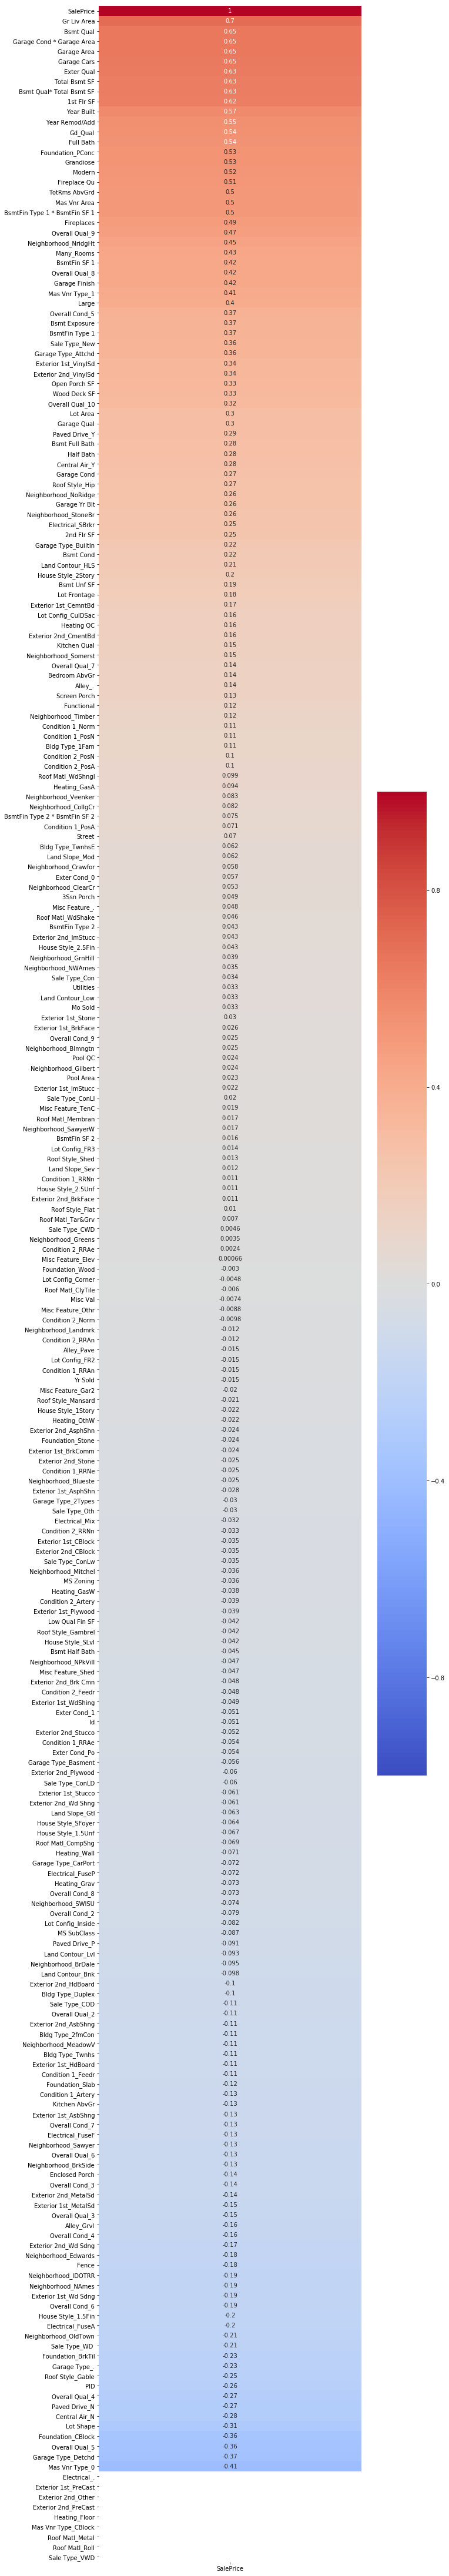

In [193]:
plt.figure(figsize=(10, 80))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

I notice that there are some columns that have all 0 values (in other words, they only appear in the test dataset). Since these are dummies, we will need to eliminate them from both of our datasets.

In [194]:
#train = train.map(lambda x: train.drop(x,inplace=True, axis=1) if train[x].mean()==0)

In [195]:
np.corrcoef(train['1st Flr SF'], train['SalePrice']).mean()

0.8092430705266975

In [196]:
# For the values that have a correlation of 0.1 or greater.
for x in train:
    if np.all(np.corrcoef(train[x],train['SalePrice'])>=0.1):
        print(x)

1st Flr SF
2nd Flr SF
Bedroom AbvGr
Bsmt Cond
Bsmt Exposure
Bsmt Full Bath
Bsmt Qual
Bsmt Unf SF
BsmtFin SF 1
BsmtFin Type 1
Exter Qual
Fireplace Qu
Fireplaces
Full Bath
Functional
Garage Area
Garage Cars
Garage Cond
Garage Finish
Garage Qual
Garage Yr Blt
Gr Liv Area
Half Bath
Heating QC
Kitchen Qual
Lot Area
Lot Frontage
Mas Vnr Area
Open Porch SF
SalePrice
Screen Porch
TotRms AbvGrd
Total Bsmt SF
Wood Deck SF
Year Built
Year Remod/Add
Garage Cond * Garage Area
Bsmt Qual* Total Bsmt SF
BsmtFin Type 1 * BsmtFin SF 1
Modern
Gd_Qual
Large
Many_Rooms
Grandiose
Overall Qual_7
Overall Qual_8
Overall Qual_9
Overall Qual_10
Overall Cond_5
Alley_.
Bldg Type_1Fam
Central Air_Y
Condition 1_Norm
Condition 1_PosN
Condition 2_PosA
Condition 2_PosN
Electrical_SBrkr
Exterior 1st_CemntBd
Exterior 1st_VinylSd
Exterior 2nd_CmentBd
Exterior 2nd_VinylSd
Foundation_PConc
Garage Type_Attchd
Garage Type_BuiltIn
House Style_2Story
Land Contour_HLS
Lot Config_CulDSac
Mas Vnr Type_1
Neighborhood_NoRidge
Neighb

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until


In [197]:
# For the values that have a negative correlation of -0.1 or lower.
for x in train:
    for i in np.corrcoef(train[x],train['SalePrice']):
        if any(i< -0.1):
            print(x)
# The check of whether the mean corraltion actually is below -0.1 will be done by hand (in the end they all were <-0.1)
# (lack of time to find out how to do it otherwise).

Enclosed Porch
Enclosed Porch
Fence
Fence
Kitchen AbvGr
Kitchen AbvGr
Lot Shape
Lot Shape
PID
PID
Overall Qual_2
Overall Qual_2
Overall Qual_3
Overall Qual_3
Overall Qual_4
Overall Qual_4
Overall Qual_5
Overall Qual_5
Overall Qual_6
Overall Qual_6
Overall Cond_3
Overall Cond_3
Overall Cond_4
Overall Cond_4
Overall Cond_6
Overall Cond_6
Overall Cond_7
Overall Cond_7
Alley_Grvl
Alley_Grvl
Bldg Type_2fmCon
Bldg Type_2fmCon
Bldg Type_Duplex
Bldg Type_Duplex
Bldg Type_Twnhs
Bldg Type_Twnhs
Central Air_N
Central Air_N
Condition 1_Artery
Condition 1_Artery
Condition 1_Feedr
Condition 1_Feedr
Electrical_FuseA
Electrical_FuseA
Electrical_FuseF
Electrical_FuseF
Exterior 1st_AsbShng
Exterior 1st_AsbShng
Exterior 1st_HdBoard
Exterior 1st_HdBoard
Exterior 1st_MetalSd
Exterior 1st_MetalSd
Exterior 1st_Wd Sdng
Exterior 1st_Wd Sdng
Exterior 2nd_AsbShng
Exterior 2nd_AsbShng
Exterior 2nd_HdBoard
Exterior 2nd_HdBoard
Exterior 2nd_MetalSd
Exterior 2nd_MetalSd
Exterior 2nd_Wd Sdng
Exterior 2nd_Wd Sdng
Foun

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


In [198]:
train.shape

(2051, 254)

In [199]:
test.shape

(879, 253)

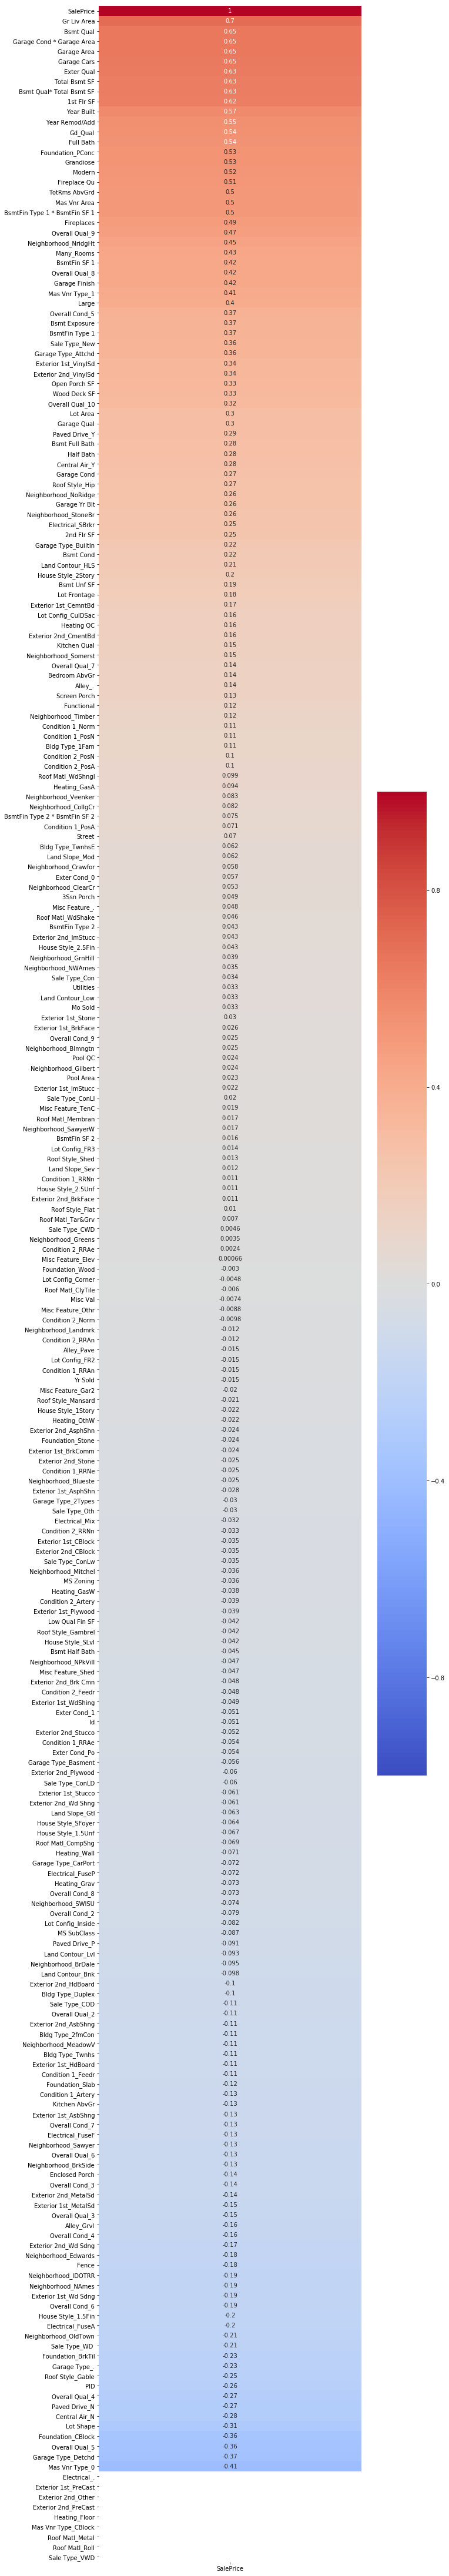

In [200]:
plt.figure(figsize=(10, 80))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [201]:
#train.corr()[['SalePrice']]

In [202]:
#np.corrcoef(train['Sale Type_VWD'], train['SalePrice'])

In [203]:
#train=train.map(lambda x: train.x.drop if np.any(np.corrcoef(train[x],train['SalePrice'])==np.NaN else pass))

In [204]:
#for x in train:
    #if np.any(np.corrcoef(train[x],train['SalePrice'])==np.NaN):
        #lisg.append(x)
        #train.x.drop

In [205]:
#(lambda yb: 1 if yb >=2000 else 0)
#train.corr()[['SalePrice']]
#train = train.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))
#test = test.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))

# 04_Model_Tuning.ipynb  

### xvars

In [206]:
xvars= ['1st Flr SF', 
        '2nd Flr SF',
        'Bedroom AbvGr',
        'Bsmt Cond',
        'Bsmt Exposure',
        'Bsmt Full Bath',
        'Bsmt Qual',
        'Many_Rooms',
        'Gd_Qual',
        'Grandiose',
        'Bsmt Unf SF',
        'BsmtFin SF 1',
        'BsmtFin Type 1',
        'Exter Qual',
        'Fireplace Qu',
        'Fireplaces',
        'Full Bath',
        'Functional',
        'Garage Area',
        'Garage Cars',
        'Garage Cond',
        'Garage Finish',
        'Garage Qual',
        'Garage Yr Blt',
        'Gr Liv Area',
        'Half Bath',
        'Heating QC',
        'Kitchen Qual',
        'Lot Area',
        'Lot Frontage',
        'Mas Vnr Area',
        'Open Porch SF',
        'Screen Porch',
        'TotRms AbvGrd',
        'Total Bsmt SF',
        'Wood Deck SF',
        'Year Built',
        'Year Remod/Add',
        'Garage Cond * Garage Area',
        'Bsmt Qual* Total Bsmt SF',
        'BsmtFin Type 1 * BsmtFin SF 1',
        'Modern',
        'Large',
        'Overall Qual_7',
        'Overall Qual_8',
        'Overall Qual_9',
        'Overall Qual_10',
        'Overall Cond_5',
        'Alley_.',
        'Bldg Type_1Fam',
        'Central Air_Y',
        'Condition 1_Norm',
        'Condition 1_PosN',
        'Condition 2_PosA',
        'Condition 2_PosN',
        'Electrical_SBrkr',
        'Exterior 1st_CemntBd',
        'Exterior 1st_VinylSd',
        'Exterior 2nd_CmentBd',
        'Exterior 2nd_VinylSd',
        'Foundation_PConc',
        'Garage Type_Attchd',
        'Garage Type_BuiltIn',
        'House Style_2Story',
        'Land Contour_HLS',
        'Lot Config_CulDSac',
        'Mas Vnr Type_1',
        'Neighborhood_NoRidge',
        'Neighborhood_NridgHt',
        'Neighborhood_Somerst',
        'Neighborhood_StoneBr',
        'Neighborhood_Timber',
        'Paved Drive_Y',
        'Roof Style_Hip',
        'Sale Type_New', 
        'Enclosed Porch', 
        'Fence',
        'Kitchen AbvGr',
        'Lot Shape',
        'PID', 
        'Overall Qual_2',
        'Overall Qual_3', 
        'Overall Qual_4',
        'Overall Qual_5',
        'Overall Qual_6',
        'Overall Cond_3',
        'Overall Cond_4',
        'Overall Cond_6',
        'Overall Cond_7',
        'Alley_Grvl',
        'Bldg Type_2fmCon',
        'Bldg Type_Duplex',
        'Bldg Type_Twnhs',
        'Central Air_N',
        'Condition 1_Artery',
        'Condition 1_Feedr',
        'Electrical_FuseA',
        'Electrical_FuseF',
        'Exterior 1st_AsbShng',
        'Exterior 1st_HdBoard',
        'Exterior 1st_MetalSd',
        'Exterior 1st_Wd Sdng',
        'Exterior 2nd_AsbShng',
        'Exterior 2nd_HdBoard',
        'Exterior 2nd_MetalSd',
        'Exterior 2nd_Wd Sdng',
        'Foundation_BrkTil',
        'Foundation_CBlock',
        'Foundation_Slab',
        'Garage Type_.',
        'Garage Type_Detchd',
        'House Style_1.5Fin',
        'Mas Vnr Type_0',
        'Neighborhood_BrkSide',
        'Neighborhood_Edwards',
        'Neighborhood_IDOTRR',
        'Neighborhood_MeadowV',
        'Neighborhood_NAmes',
        'Neighborhood_OldTown',
        'Neighborhood_Sawyer',
        'Paved Drive_N',
        'Roof Style_Gable',
        'Sale Type_COD', 
        'Sale Type_WD ']

# 121 variables that have a correlation with SalePrice of at least |0.1|. 

### Defining x and y

In [207]:
#features = [col for col in train._get_numeric_data().columns if col != 'SalePrice']
X = train[xvars]
y = train['SalePrice']

### Splitting

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [209]:
from sklearn.preprocessing import StandardScaler

In [210]:
ss = StandardScaler()

# Fit AND transform Standard Scaler to overfit data in one step.
ss.fit(X_train, y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [211]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Ridge Model + Results

In [212]:
from sklearn.linear_model import Ridge

In [213]:
ridge = Ridge(alpha = 200)
ridge.fit(X_train, y_train);

In [214]:
#ridge = Ridge(alpha=10)
#ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
#ridge_scores.mean()

# Ridge

### For train

In [215]:

ridge = Ridge(alpha = 200)
ridge.fit(X_train, y_train);

###model=LinearRegression()
###model.fit(X,y)

print('1.-The model coeficient is:', ridge.coef_)
print('2.-The model intercept is:', ridge.intercept_)

preds= ridge.predict(X_train)
resids = y_train - preds

#print(r2_score(y, preds))

mae= np.mean(np.abs(y_train-preds))
print("3.-The model's mean absolute error is:", mae)

sse= np.sum(resids ** 2)
print("4.-The model's 'residual sum of squares' is:", sse)

#print(metrics.mean_squared_error(y, preds))

print('5.-The models mean squared error is:', np.mean(resids**2))

y_null= y_train.mean()
y_null

resids_null = (y_train - y_null)

print('6.-The models root mean squared error is:', np.sqrt(np.mean(resids**2)))

print('7.-The models null sum of squares is:', np.sum(resids_null**2))

print('8.-The models coefficient of determination is:', metrics.r2_score(y_train, preds))

1.-The model coeficient is: [ 4.77044127e+03  4.47385007e+03  6.99814908e+02 -3.00062130e+02
  3.80860592e+03  4.68773453e+03  1.88600032e+03  5.80693167e+02
  4.38250660e+03  2.92723870e+03 -1.78220875e+03  9.37645152e+02
  2.15478257e+03  3.89788241e+03  3.81865681e+03  1.52820946e+03
  4.86379840e+03  2.00172687e+03  9.33322228e+02  3.38838356e+03
  7.36155514e+02  1.20814109e+03  6.03959157e+02 -1.19051928e+03
  7.83362928e+03  2.67809810e+03  6.17706916e+02  1.23215227e+03
  6.55111261e+02 -1.89156347e+02  3.07338222e+03  5.36452325e+01
  4.89930782e+03  3.38033514e+03  2.01041340e+03  1.15591060e+03
  9.42628220e+02  3.20191328e+03  1.54292001e+03  2.00648426e+03
  1.78666376e+02  1.23028735e+03  3.34073618e+03 -8.77663083e+02
  4.59569771e+03  1.18309390e+04  5.59258377e+03 -2.86760092e+03
  7.42808402e+02  5.07311559e+03  1.83312823e+02  2.44276324e+03
  2.16964335e+03  1.51623431e+03  8.89481356e+02 -3.26467346e+02
  1.92473504e+03  4.00756327e+02  1.53625528e+02  2.01913697e+

### For test

In [216]:
ridge = Ridge(alpha = 200)
ridge.fit(X_test, y_test);

preds= ridge.predict(X_test)
resids = y_test - preds

#print(r2_score(y, preds))

mae= np.mean(np.abs(y_test - preds))
print("3.-The model's mean absolute error is:", mae)

sse= np.sum(resids ** 2)
print("4.-The model's 'residual sum of squares' is:", sse)

#print(metrics.mean_squared_error(y, preds))

print('5.-The models mean squared error is:', np.mean(resids**2))

y_null= y_test.mean()
y_null

resids_null = (y_test - y_null)

print('6.-The models root mean squared error is:', np.sqrt(np.mean(resids**2)))

print('7.-The models null sum of squares is:', np.sum(resids_null**2))

print('8.-The models coefficient of determination is:', metrics.r2_score(y_test, preds))

3.-The model's mean absolute error is: 14940.192810696248
4.-The model's 'residual sum of squares' is: 216451388765.8852
5.-The models mean squared error is: 421932531.7073786
6.-The models root mean squared error is: 20540.99636598426
7.-The models null sum of squares is: 3149832686649.501
8.-The models coefficient of determination is: 0.931281623407075


# 05_Production_Model_and_Insights.ipynb

In [217]:
text_X= test[xvars]

In [218]:
text_X = ss.fit_transform(text_X)

In [219]:
preds = ridge.predict(text_X)

In [220]:
preds.mean()

181971.62896198552

In [221]:
preds.max()

574602.7055871128

In [222]:
preds.shape

(879,)

In [223]:
submission = pd.DataFrame(test['Id'])

In [224]:
submission.shape

(879, 1)

In [225]:
submission['SalePrice']= preds

In [226]:
submission.max()

Id             2928.000000
SalePrice    574602.705587
dtype: float64

In [227]:
submission.head()

,Id,SalePrice
0,2658,117502.231145
1,2718,177471.973912
2,2414,215288.555430
3,1989,126402.453358
4,625,182434.945081


# 06_Kaggle_Submissions.ipynb   

In [228]:
#submission.to_csv('Thursday Subm41', index=False)